In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [ ]:
#load data and read Las file
df = pd.read_csv('/content/drive/My Drive/Dataset/Diamond_train_Data.csv')

1. Data cleaning and preprocessing

In [ ]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.shape

(43152, 13)

In [ ]:
df.size

560976

# Get infrormation about data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


# Check null values

In [ ]:
df.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

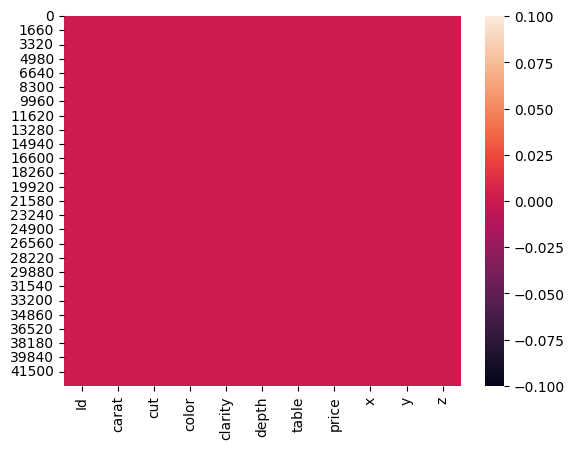

In [ ]:
sns.heatmap(df.isnull())

# Check Duplications

In [ ]:
df.duplicated(subset=['Id'])

0        False
1        False
2        False
3        False
4        False
         ...  
43147    False
43148    False
43149    False
43150    False
43151    False
Length: 43152, dtype: bool

In [ ]:
df.duplicated(subset=['Id']).sum()

0

# Check Categoricals Data

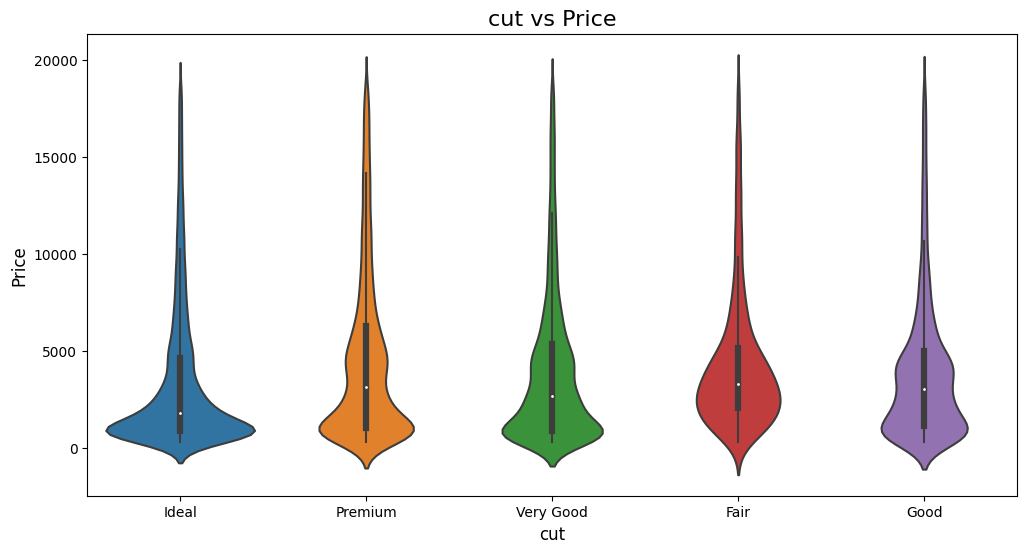

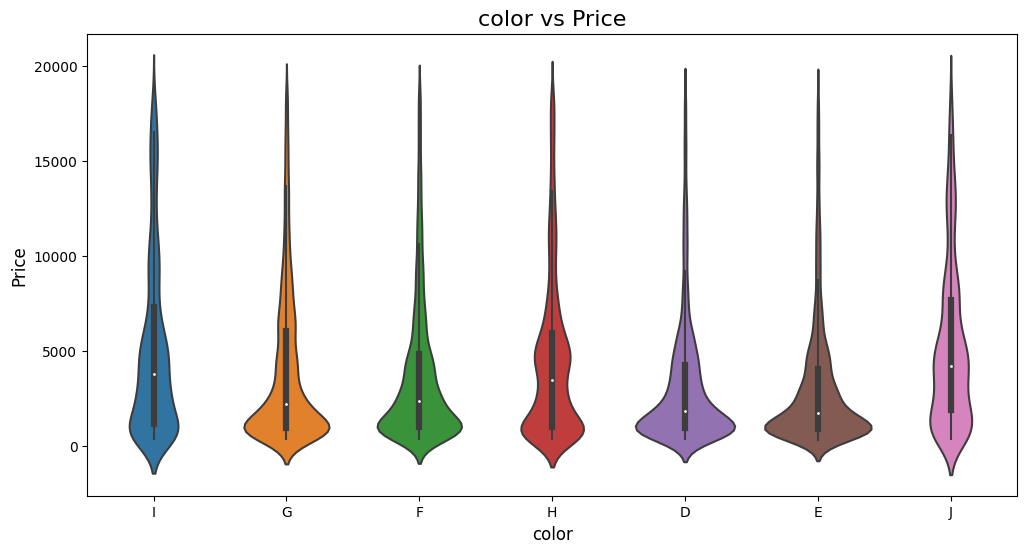

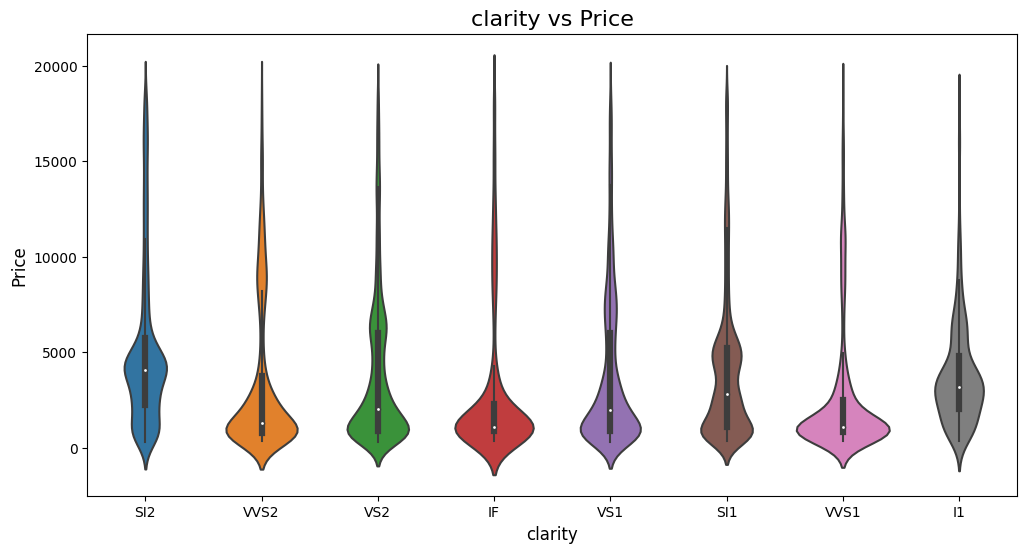

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)

# Create violin plots for each categorical variable
for col in object_cols:
    plt.figure(figsize=(12,6))
    sns.violinplot(x=col, y='price', data=df)
    plt.title(f"{col} vs Price", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.show()


Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64


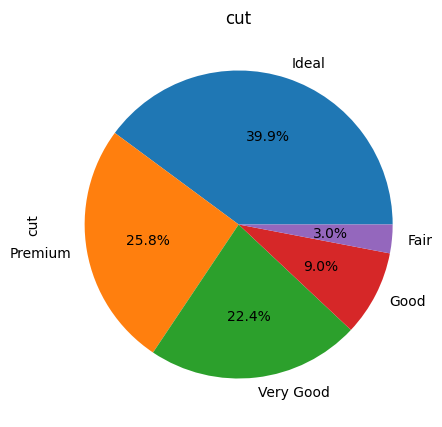

###################################------------------------------------------------------##########################
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64


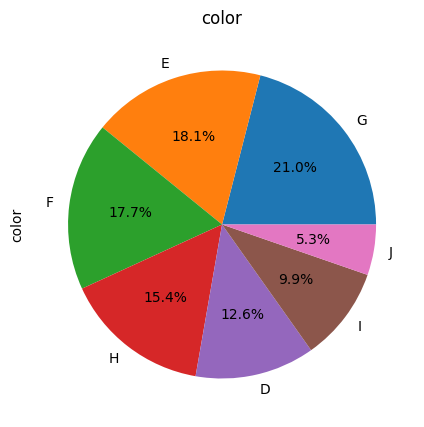

###################################------------------------------------------------------##########################
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64


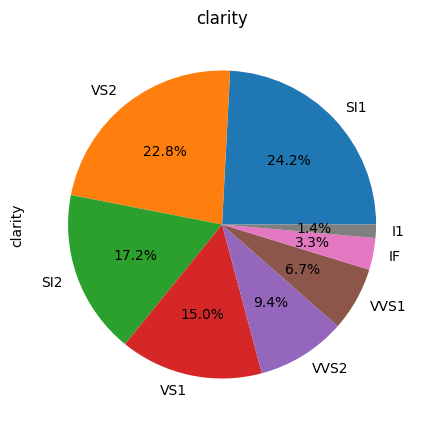

###################################------------------------------------------------------##########################


In [ ]:
for col in object_cols:

    fig, ax = plt.subplots(figsize=(10,5))
    df[col].value_counts().plot(kind='pie',autopct='%0.1f%%')
    print(df[col].value_counts())
    plt.title(col)
    plt.show()
    print("###################################------------------------------------------------------##########################")


1. "Ideal" diamond cuts are the most in the number while the "Fair" is the least.
2.  "G" color diamond which is the best  re most common however,"J" color diamond which is worst are most rare .
3.  "SI1" Diamonds of clarity which is best as well as "I1" which is worst are very rare and rest are mostly of in-between clarities

# Descriptive Statisitcs

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,43152.0,21576.500000,12457.053745,1.0,10788.75,21576.50,32364.25,43152.00
carat,43152.0,0.797855,0.473594,0.2,0.40,0.70,1.04,5.01
depth,43152.0,61.747177,1.435454,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.458347,2.233904,43.0,56.00,57.00,59.00,95.00
price,43152.0,3929.491912,3985.527795,326.0,947.75,2401.00,5312.00,18823.00
x,43152.0,5.731568,1.121279,0.0,4.71,5.70,6.54,10.74
y,43152.0,5.735018,1.148809,0.0,4.72,5.71,6.54,58.90
z,43152.0,3.538568,0.708238,0.0,2.91,3.53,4.04,31.80


In [ ]:
# Select only the numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
for col in num_cols.columns :
  print(f'Central tendency Measurement of {col} is mean={num_cols[col].mean().round(0)},median={num_cols[col].median()},mode={num_cols[col].mode()}')

Central tendency Measurement of Id is mean=21576.0,median=21576.5,mode=0            1
1            2
2            3
3            4
4            5
         ...  
43147    43148
43148    43149
43149    43150
43150    43151
43151    43152
Name: Id, Length: 43152, dtype: int64
Central tendency Measurement of carat is mean=1.0,median=0.7,mode=0    0.3
Name: carat, dtype: float64
Central tendency Measurement of depth is mean=62.0,median=61.8,mode=0    62.0
Name: depth, dtype: float64
Central tendency Measurement of table is mean=57.0,median=57.0,mode=0    56.0
Name: table, dtype: float64
Central tendency Measurement of price is mean=3929.0,median=2401.0,mode=0    828
Name: price, dtype: int64
Central tendency Measurement of x is mean=6.0,median=5.7,mode=0    4.37
Name: x, dtype: float64
Central tendency Measurement of y is mean=6.0,median=5.71,mode=0    4.37
Name: y, dtype: float64
Central tendency Measurement of z is mean=4.0,median=3.53,mode=0    2.7
Name: z, dtype: float64


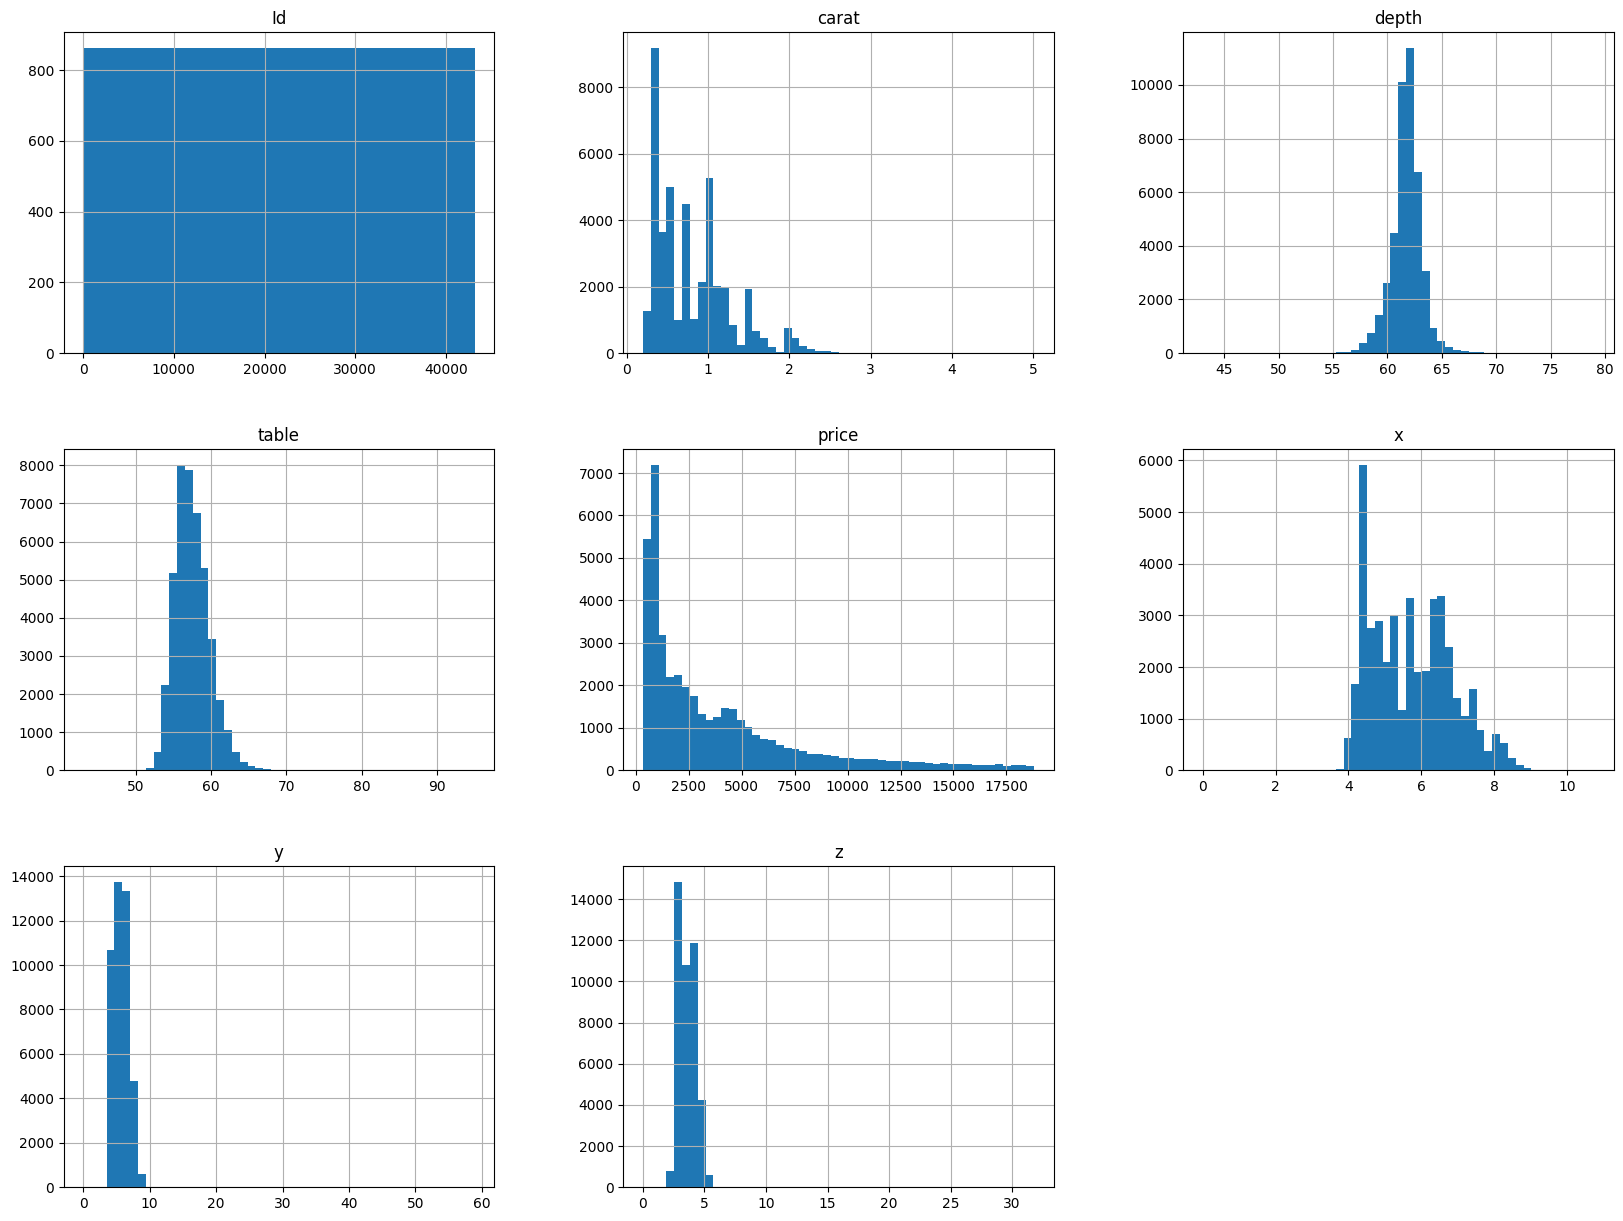

In [ ]:
df.hist(figsize = (20,15),bins = 50)
plt.show()

In [ ]:
skweness = df.skew()
skweness

<ipython-input-212-b480e664938b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skweness = df.skew()


Id       0.000000
carat    1.109267
depth   -0.158779
table    0.804091
price    1.616648
x        0.380849
y        2.907348
z        1.795395
dtype: float64

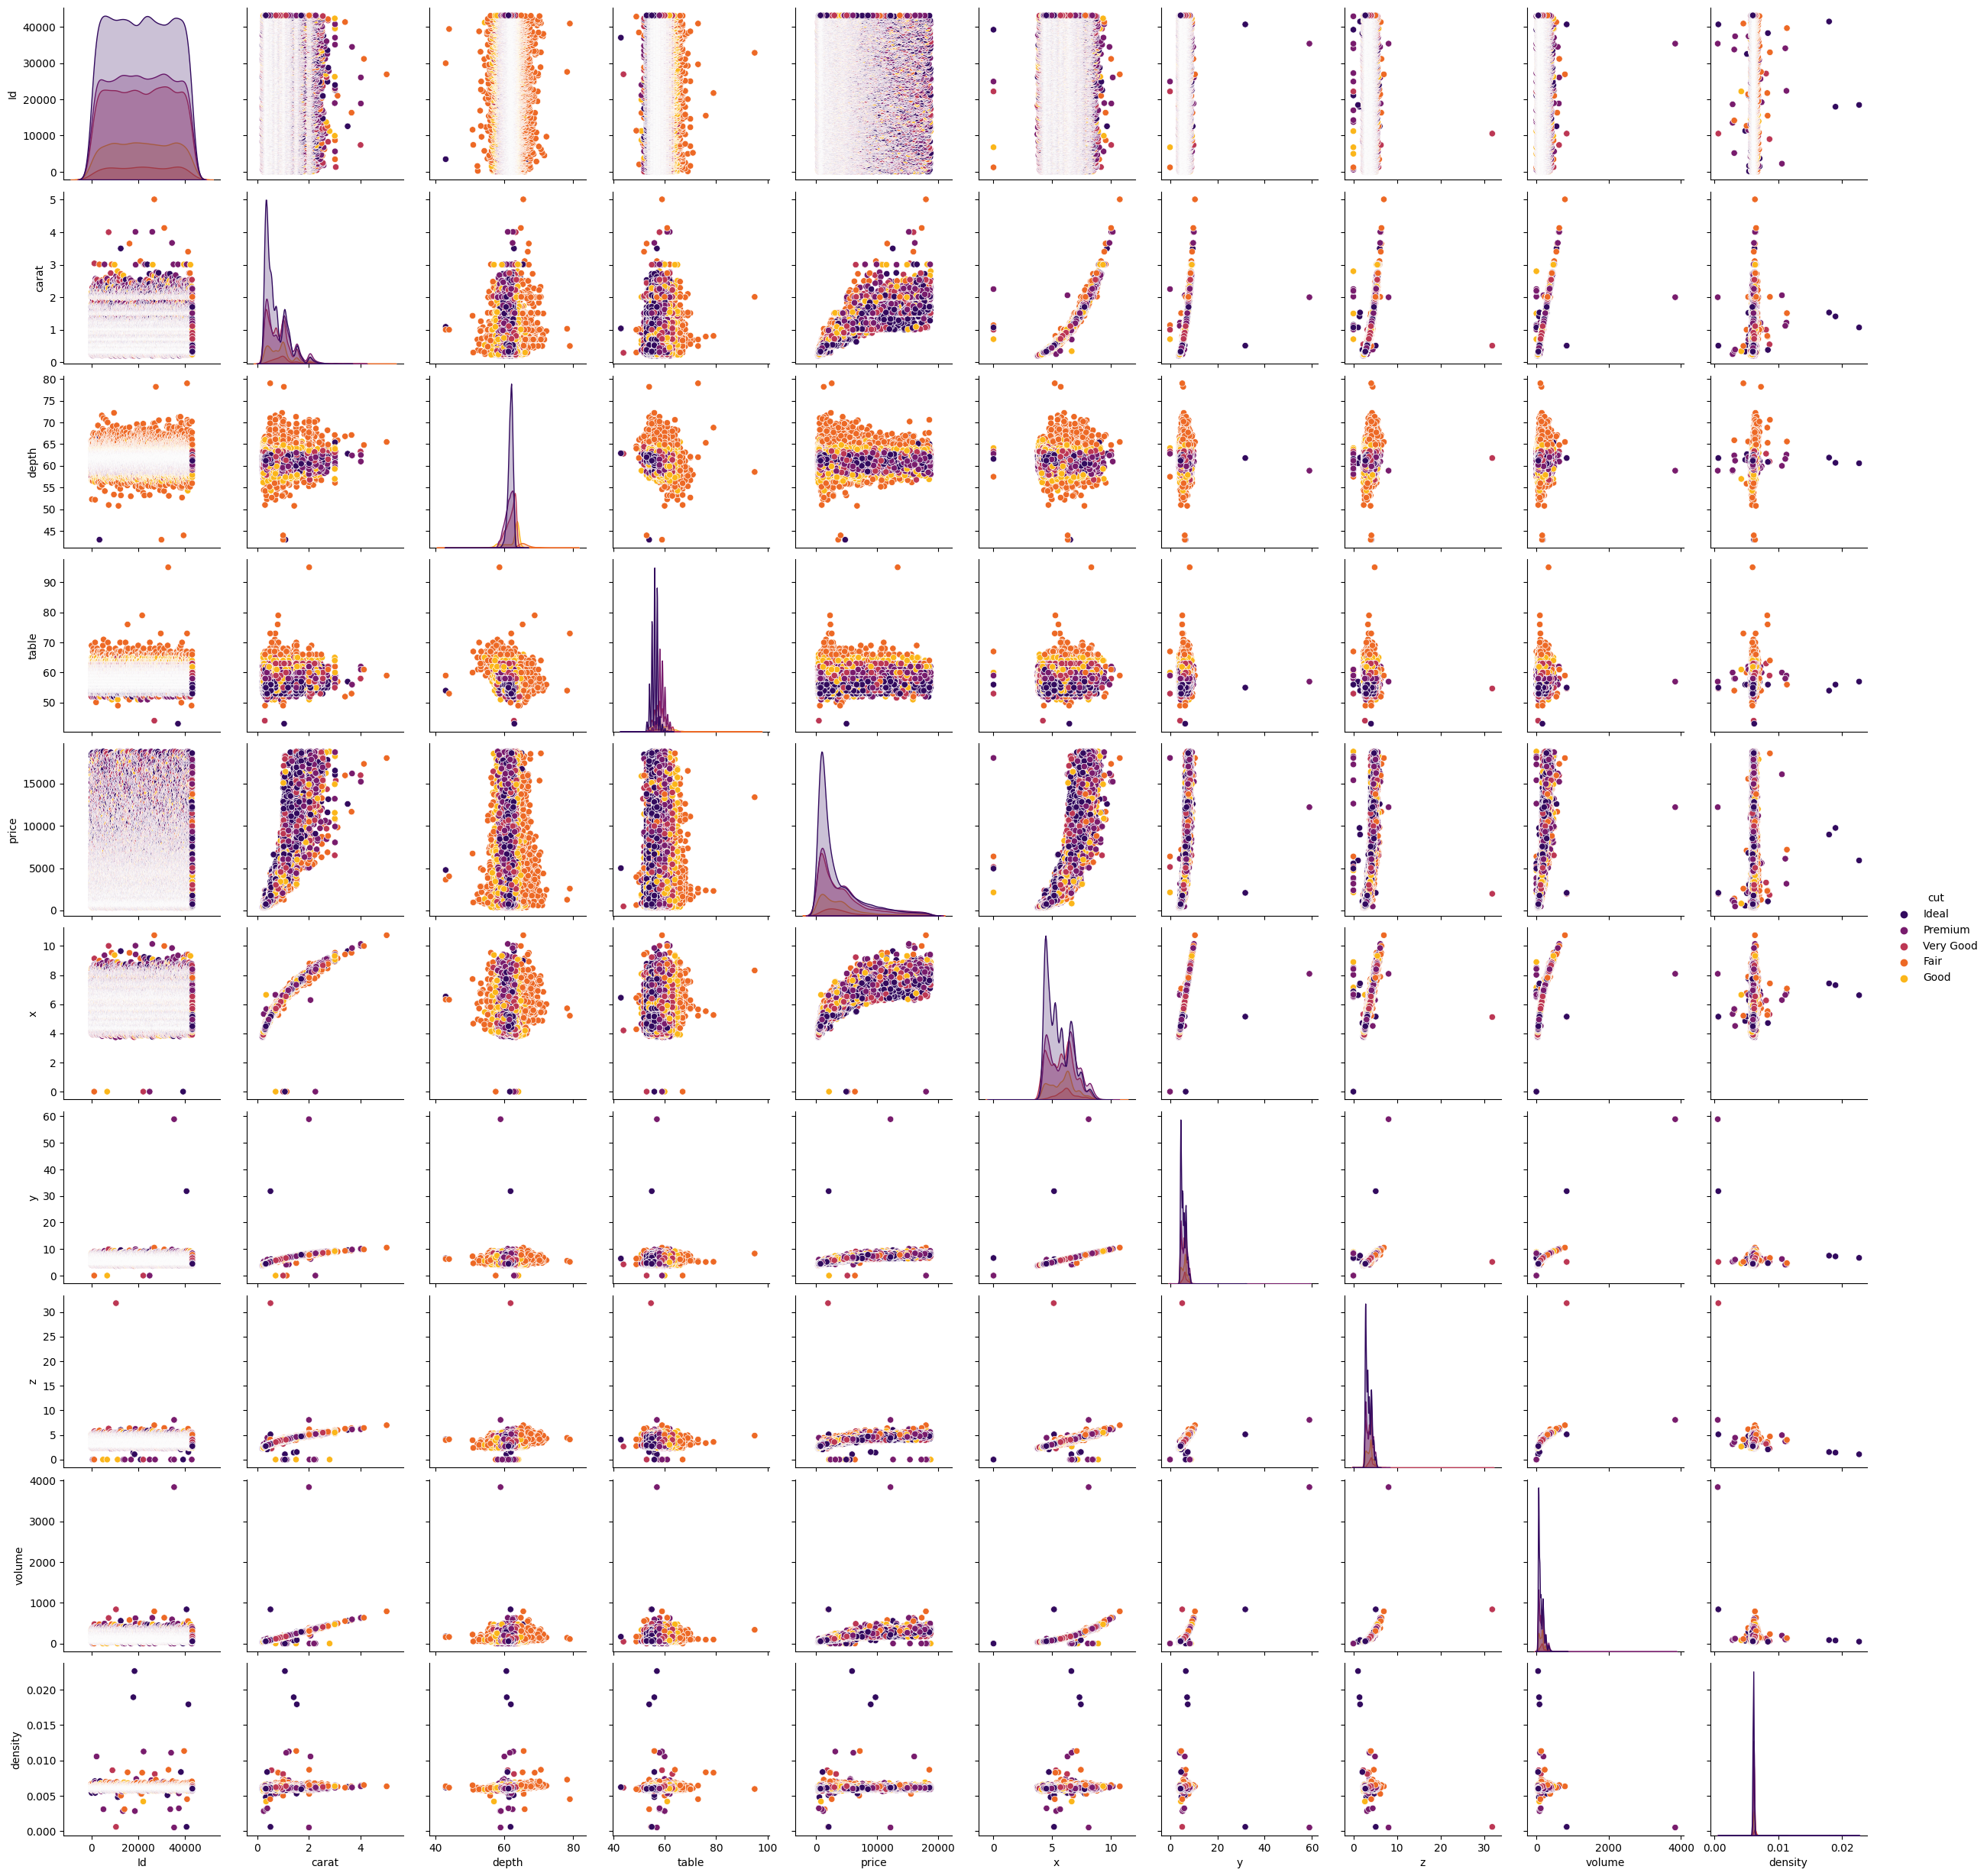

In [ ]:
#Doing Bivariate Analysis by examaning a pairplot  
ax = sns.pairplot(df, hue= "cut" , palette = 'inferno')

# Checking for Potential Outliers


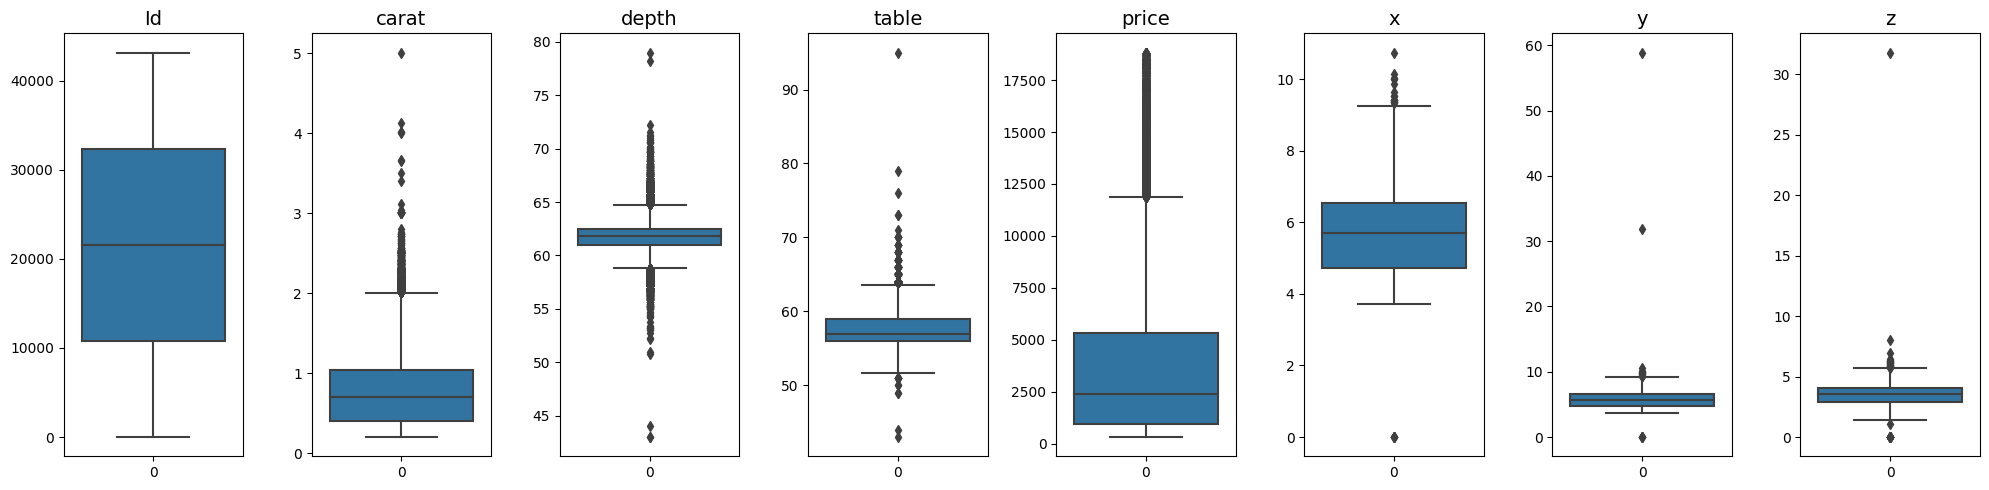

In [ ]:
#Define the numerical columns
num_cols = ['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create a figure with subplots for each numerical column
fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20,5))

# Loop through the numerical columns and create a boxplot for each
for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axs[i])
    axs[i].set_title(col, fontsize=14)
    axs[i].set_xlabel('')
    
plt.tight_layout()
plt.show()

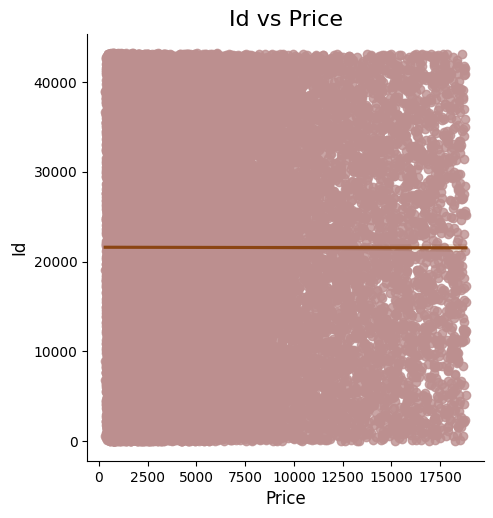

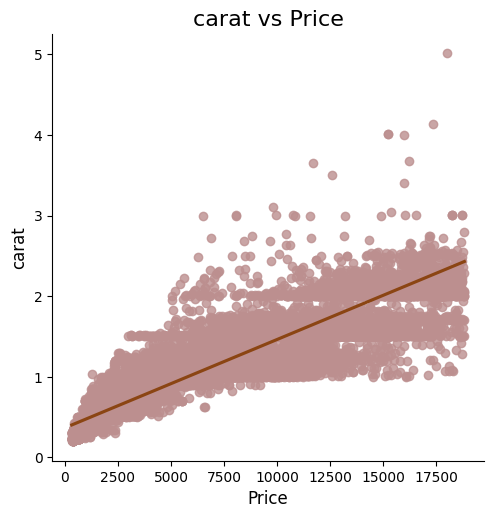

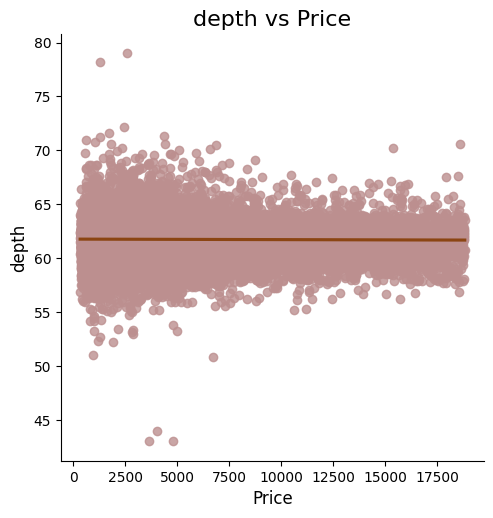

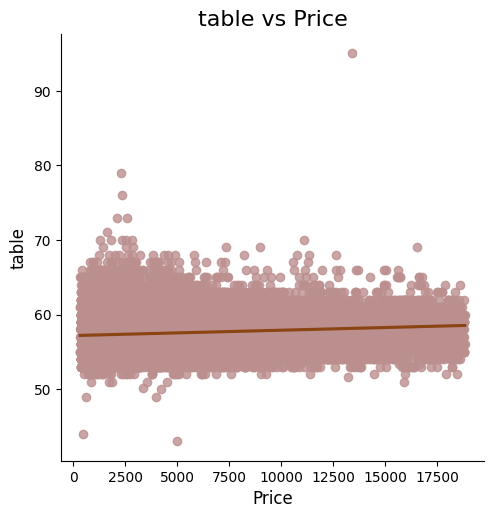

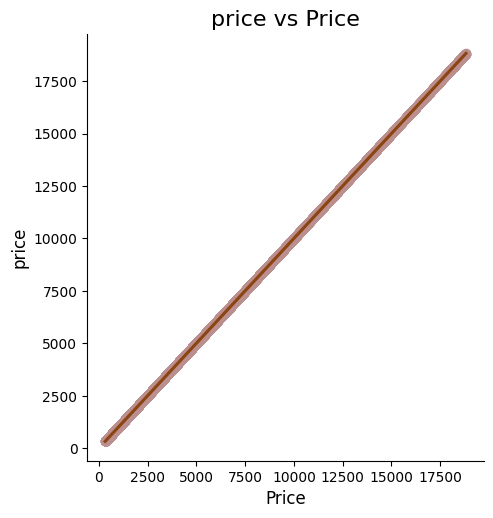

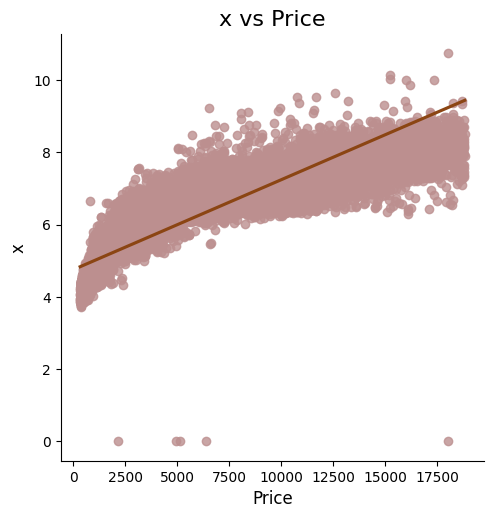

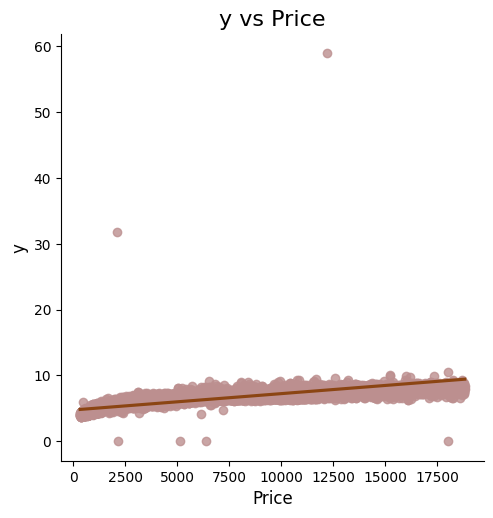

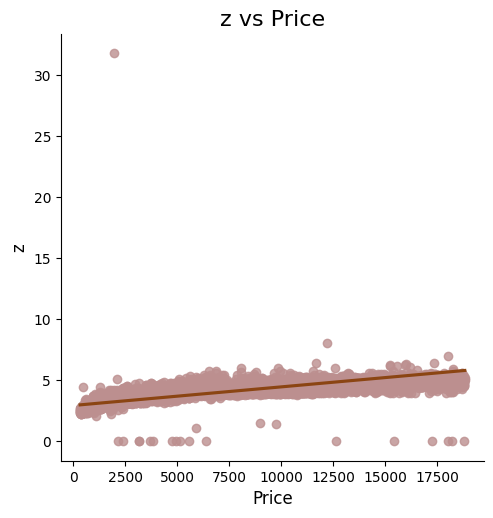

In [ ]:
num_cols = ['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


for col in num_cols:
    sns.lmplot(x='price', y=col, data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
    plt.title(f"{col} vs Price", fontsize=16)
    plt.xlabel('Price', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate z-scores for numerical columns
zscore = np.abs(stats.zscore(df[numerical_cols]))

# Find indices of datapoints with z-scores greater than 3 (threshold)
outlier_indices = np.where(zscore > 3)[0]

# Print the number of outliers detected
print(f"Number of outliers detected: {len(outlier_indices)}")
print(f"Outlier indices: {outlier_indices}")

Number of outliers detected: 2218
Outlier indices: [   23    62   120 ... 43111 43138 43138]


In [ ]:
import pandas as pd
import numpy as np


# Create an empty dictionary to store the number of outliers for each column
outlier_counts = {}

# Iterate through each column in the list of column names
for column in numerical_cols:
    # Calculate the z-scores for the column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Set a threshold to identify outliers (e.g., z-score greater than 3)
    threshold = 3

    # Count the number of outliers for the column
    num_outliers = sum(z_scores > threshold)

    # Store the number of outliers in the dictionary
    outlier_counts[column] = num_outliers

# Print the number of outliers for each column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")


Column 'Id': 0 outliers
Column 'carat': 346 outliers
Column 'depth': 562 outliers
Column 'table': 259 outliers
Column 'price': 955 outliers
Column 'x': 30 outliers
Column 'y': 23 outliers
Column 'z': 43 outliers


# Feature Engineering

In [ ]:
# Calculate Volume
df['volume'] = df['x'] * df['y'] * df['z']

# Calculate Density
df['density'] = df['carat'] / df['volume']

In [ ]:
df

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18,84.997584,0.006118
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55,115.946550,0.006210
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02,72.801630,0.006044
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65,51.419010,0.006029


#Data Preparation

In [ ]:
df_ID= df['Id']
df_Price= df['price']
df_filtered = df.drop(['Id', 'price'], axis=1)

In [ ]:
df_filtered

,carat,cut,color,clarity,depth,table,x,y,z,volume,density
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07,176.483340,0.006006
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51,246.965796,0.006114
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71,52.943373,0.006044
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19,86.422842,0.006133
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50,115.315200,0.006070
...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,5.16,5.18,3.18,84.997584,0.006118
43148,0.72,Very Good,D,VS2,62.1,59.0,5.70,5.73,3.55,115.946550,0.006210
43149,0.44,Premium,I,VVS1,61.5,58.0,4.95,4.87,3.02,72.801630,0.006044
43150,0.31,Premium,E,VS1,60.2,58.0,4.38,4.43,2.65,51.419010,0.006029


In [ ]:
df_filtered.shape

(43152, 11)

In [ ]:
df_filtered.describe()

,carat,depth,table,x,y,z,volume,density
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,4.315200e+04
mean,0.797855,61.747177,57.458347,5.731568,5.735018,3.538568,129.852555,inf
std,0.473594,1.435454,2.233904,1.121279,1.148809,0.708238,78.621399,NaN
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,5.207522e-04
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,65.135658,6.048225e-03
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,114.832253,6.117163e-03
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,170.844390,6.190022e-03
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,3840.598060,inf


#** Diamond data have  3 Problems :**
1.  datapoints  x, y and z features have min 0 value maybe it will cause error
2. we have 3 Categorical columns { Color, Cut , Clarity } and Machine learning Model deals only with Numerical data
3. Data have 2218 outliers 

# Remove 0 from x ,y ,z , Volume and Density 

In [ ]:
# Removing the datapoints having min 0 value in either x, y or z features 
df_filtered = df_filtered.drop(df_filtered[df_filtered["volume"]==0].index)
df_filtered = df_filtered.drop(df_filtered[df_filtered["x"]==0].index)
df_filtered = df_filtered.drop(df_filtered[df_filtered["y"]==0].index)
df_filtered= df_filtered.drop(df_filtered[df_filtered["z"]==0].index)
df_filtered.shape

(43135, 11)

In [ ]:
df_filtered.describe()

,carat,depth,table,x,y,z,volume,density
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,5.731757,5.735070,3.539962,129.903731,0.006127
std,0.473325,1.435091,2.233401,1.119336,1.147272,0.704884,78.594608,0.000186
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,31.707984,0.000521
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,65.164320,0.006048
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,114.846336,0.006117
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,170.846550,0.006190
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,3840.598060,0.022647


# Convert categorical variables using OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
Order_encoder = OrdinalEncoder()
for col in columns:
    df_filtered[col] = Order_encoder.fit_transform(df_filtered[col].values.reshape(-1,1))  

In [ ]:
df_filtered

,carat,cut,color,clarity,depth,table,x,y,z,volume,density
0,1.06,2.0,5.0,3.0,61.8,57.0,6.57,6.60,4.07,176.483340,0.006006
1,1.51,3.0,3.0,7.0,60.9,58.0,7.38,7.42,4.51,246.965796,0.006114
2,0.32,2.0,2.0,5.0,61.3,56.0,4.43,4.41,2.71,52.943373,0.006044
3,0.53,2.0,3.0,5.0,61.2,56.0,5.19,5.22,3.19,86.422842,0.006133
4,0.70,3.0,4.0,7.0,61.0,57.0,5.76,5.72,3.50,115.315200,0.006070
...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,2.0,1.0,5.0,61.5,56.0,5.16,5.18,3.18,84.997584,0.006118
43148,0.72,4.0,0.0,5.0,62.1,59.0,5.70,5.73,3.55,115.946550,0.006210
43149,0.44,3.0,5.0,6.0,61.5,58.0,4.95,4.87,3.02,72.801630,0.006044
43150,0.31,3.0,1.0,4.0,60.2,58.0,4.38,4.43,2.65,51.419010,0.006029


# Remove Outliers

In [ ]:
#Dropping the outliers. 
df_filtered = df_filtered[(df_filtered["depth"]<75)&(df_filtered["depth"]>45)]
df_filtered = df_filtered[(df_filtered["table"]<80)&(df_filtered["table"]>40)]
df_filtered = df_filtered[(df_filtered["x"]<30)]
df_filtered = df_filtered[(df_filtered["y"]<30)]
df_filtered = df_filtered[(df_filtered["z"]<30)&(df_filtered["z"]>2)]
df_filtered.shape

(43123, 11)

In [ ]:
df_filtered['price'] = df['price']

In [ ]:
df_filtered

,carat,cut,color,clarity,depth,table,x,y,z,volume,density,price
0,1.06,2.0,5.0,3.0,61.8,57.0,6.57,6.60,4.07,176.483340,0.006006,4270
1,1.51,3.0,3.0,7.0,60.9,58.0,7.38,7.42,4.51,246.965796,0.006114,15164
2,0.32,2.0,2.0,5.0,61.3,56.0,4.43,4.41,2.71,52.943373,0.006044,828
3,0.53,2.0,3.0,5.0,61.2,56.0,5.19,5.22,3.19,86.422842,0.006133,1577
4,0.70,3.0,4.0,7.0,61.0,57.0,5.76,5.72,3.50,115.315200,0.006070,2596
...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,2.0,1.0,5.0,61.5,56.0,5.16,5.18,3.18,84.997584,0.006118,1760
43148,0.72,4.0,0.0,5.0,62.1,59.0,5.70,5.73,3.55,115.946550,0.006210,3016
43149,0.44,3.0,5.0,6.0,61.5,58.0,4.95,4.87,3.02,72.801630,0.006044,990
43150,0.31,3.0,1.0,4.0,60.2,58.0,4.38,4.43,2.65,51.419010,0.006029,734


#Check Correlation

In [ ]:
# Create the heatmap with the correlation matrix
corr_matrix = df_filtered.corr()

In [ ]:
corr_matrix['price'].sort_values(ascending = False)

price      1.000000
volume     0.923887
carat      0.921868
y          0.888862
x          0.887148
z          0.882801
density    0.179245
color      0.171554
table      0.128278
cut        0.042462
depth     -0.012773
clarity   -0.069238
Name: price, dtype: float64

<Axes: >

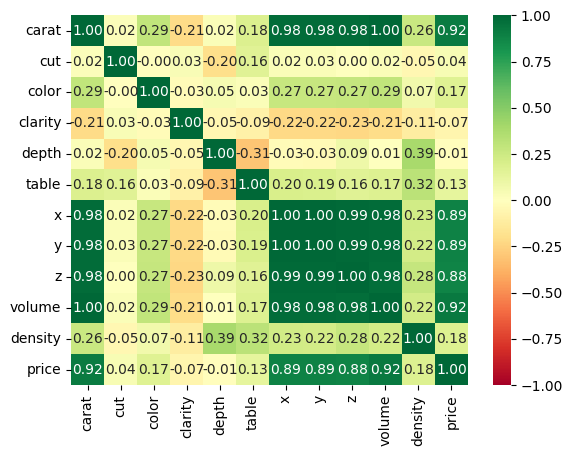

In [ ]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', vmin=-1, vmax=1)

# We found that price has: 
1. High Positive  correlation with X , Y ,Z , Carat , Volumne
2. Mid Positive Correlation with Color , Table , Density
3. Low Positive Correlation with Cut
4. Negative  correlation with Depth , Clarity


#Select and Train Model

1.split the data

In [ ]:
X = df_filtered.drop(['price'],axis=1)
y = df_filtered['price']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y ,test_size=0.30 ,  random_state=44 , shuffle =True )

In [ ]:
print(f'X_train shape = {X_train.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'X_test shape = {X_test.shape}')
print(f'y_test shape = {y_test.shape}')

X_train shape = (30186, 11)
y_train shape = (30186,)
X_test shape = (12937, 11)
y_test shape = (12937,)


2. Select best Algorithm 

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("kn_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("xgb_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

In [ ]:
# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1323.453474 
DecisionTree: -774.138583 
RandomForest: -564.783201 
KNeighbors: -876.805047 
XGBRegressor: -557.313901 


In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [ ]:
# Model Evaluation
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

MSE: 299935.1088262099
RMSE: 547.6633170353934


#Loading Diamon test data

In [ ]:
Diamond_test_data = pd.read_csv('/content/drive/My Drive/Dataset/Diamond_test_Data.csv')

In [ ]:
Diamond_test_data

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [ ]:
# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
Order_encoder = OrdinalEncoder()
for col in columns:
    Diamond_test_data[col] = Order_encoder.fit_transform(Diamond_test_data[col].values.reshape(-1,1))  

In [ ]:
# Calculate Volume
Diamond_test_data['volume'] = Diamond_test_data['x'] * Diamond_test_data['y'] * Diamond_test_data['z']

# Calculate Density
Diamond_test_data['density'] = Diamond_test_data['carat'] / Diamond_test_data['volume']

In [ ]:
Diamond_test_data

,Id,carat,cut,color,clarity,depth,table,x,y,z,volume,density
0,1,0.34,2.0,3.0,7.0,61.1,57.0,4.52,4.48,2.75,55.686400,0.006106
1,2,0.71,3.0,1.0,5.0,62.7,58.0,5.74,5.68,3.58,116.719456,0.006083
2,3,0.44,4.0,5.0,4.0,62.8,56.0,4.83,4.88,3.05,71.889720,0.006120
3,4,0.81,3.0,1.0,3.0,60.1,59.0,6.09,6.03,3.65,134.037855,0.006043
4,5,0.40,2.0,3.0,6.0,61.2,56.0,4.74,4.80,2.92,66.435840,0.006021
...,...,...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,2.0,4.0,4.0,60.9,56.0,5.34,5.36,3.26,93.309024,0.006109
10784,10785,1.05,2.0,3.0,5.0,60.8,57.0,6.65,6.58,4.02,175.903140,0.005969
10785,10786,0.71,2.0,1.0,6.0,62.3,55.0,5.68,5.72,3.55,115.338080,0.006156
10786,10787,1.11,3.0,1.0,3.0,61.0,60.0,6.68,6.66,4.07,181.069416,0.006130


In [ ]:
ID = Diamond_test_data['Id']

In [ ]:
# Define the parameter grid for the hyperparameter search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an instance of the XGBRegressor
xgb_model = XGBRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters found
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

553.8462381907275 {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
614.2878290053758 {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
4217.339473028442 {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.001, 'colsample_bytree': 0.9}
4215.3700228353255 {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.001, 'colsample_bytree': 1.0}
4615.019416822521 {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.001, 'colsample_bytree': 1.0}
565.8566480599101 {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
749.8439495188422 {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
4217.167122089541 {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.001, 'colsample_bytree': 0.9}
607.764167569499 {'sub

In [ ]:
# Create an instance of the XGBRegressor
xgb_model = XGBRegressor()

xgb_model = XGBRegressor(**random_search.best_params_)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred = xgb_model.predict(Diamond_test_data.drop('Id',axis=1))
data={'Id': ID, 'price':pred }
sub = pd.DataFrame(data=data)

In [ ]:
sub

,Id,price
0,1,857.895081
1,2,2871.218506
2,3,837.089722
3,4,2764.442627
4,5,1118.859253
...,...,...
10783,10784,1718.203247
10784,10785,6510.471191
10785,10786,4109.512207
10786,10787,4751.212402


In [ ]:
sub.to_csv('sub.csv',index=False)

In [ ]:
from google.colab import files
files.download('sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>